<a href="https://colab.research.google.com/github/IC-03/Royal-Flush/blob/main/Royal_Flush_Classification_Models_For_A_Poker_Hands_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Royal Flush: Classification models for a Poker Hands Dataset
---

![](https://drive.google.com/uc?export=view&id=1KyVqgF2ZzPquw5sAtSzY8IPgt-tc-Dfh)

---

## ♠ About
**Autores**: Isabella Callejas Mandon, Geiner Duvan Guevara Vargas.

**Objetivo**: Clasificar manos de póquer según la combinación que presenten las cartas.

**Disclaimer**: Este proyecto no buscar incentivar a los juegos de azar, esto es para experimentar.

El dataset fue conseguido aquí: [Keel Datasets](https://sci2s.ugr.es/keel/dataset.php?cod=194)

---

## ♣ Contexto
En una baraja estándar de póquer tiene cada carta tiene dos atributos:

- Un palo o suit (S): Corazón, Trebol, Diamante, Picas. Representación respectiva [ 1-4 ]

- Un rango (C): Ace (A), 2-10, Jack o Joker (J), Queen (Q), King (K). Representación respectiva [ 1-13 ].

Es decir, tenemos 13 cartas por cada palo = 13*4 = 52 cartas en total.
Tampoco se tiene en cuenta si las cartas tienen un valor, nos interesan las combinaciones de estas.

Ejemplo:
![](https://drive.google.com/uc?export=view&id=1J_A4gEA7lfiSB3T2LLbCKGCZV5JCeWGw)

Por otra parte, una **mano de poquer** consiste en 5 cartas, hay combinaciones muy específicas que se pueden **clasificar** de la siguiente manera.

[ 0 ] **Nada en mano**: No entra en las otras clasificaciones

![](https://drive.google.com/uc?export=view&id=1C8LWL5HYU_I1jeh0RfYWq6sRJ2Rs795N)

[ 1 ] **Un par**: Dos cartas con el misma rango

![](https://drive.google.com/uc?export=view&id=1ahscQb47MuU9ukC7fd_jLnvH_nNuZVDP)

[ 2 ] **Dos pares**: Dos pares de cartas, los pares son diferentes entre sí

![](https://drive.google.com/uc?export=view&id=1T65kwB1GpUNuqnc89fDGy7uT3ZEeVIcy)

[ 3 ] **Trio**: 3 cartas con la misma letra o número

![](https://drive.google.com/uc?export=view&id=1C1gOmFzB-Ervz4NPxSDiDADNt3stkENR)

[ 4 ] **Escalera**: Las 5 cartas son secuenciales sin importar el palo

![](https://drive.google.com/uc?export=view&id=1qpSiO7IyEirJ6n_P8nNGfoK33BQ6b2xU)

[ 5 ] **Flush/ Color/ Flor**: 5 cartas del mismo palo

![](https://drive.google.com/uc?export=view&id=1wG3BL33F3mmqmDxzhWzQeRc7vxAVf3ak)

[ 6 ] **Full House**: Trio + Par

![](https://drive.google.com/uc?export=view&id=1ort3P87a9XbwSer8jps_670LvFk8drgp)

[ 7 ] **Cuarto de un tipo** : 4 cartas de un mismo rango pero diferentes palos.

[ 8 ] **Escalera de color**: Las 5 cartas son secuenciales y del mismo palo

![](https://drive.google.com/uc?export=view&id=1DqQi_HzrWcZa8J_Ota5Wj4YXV1lYZrAA)

[ 9 ] **Flor Imperial / Royal Flush**: As, K, Q, J, 10 y del mismo palo

![](https://drive.google.com/uc?export=view&id=1HZ-bEq_cbW8ISEQPI42RHRfgIlXN5F3L)

Los icónos diseñados por: [riajulislam](https://www.flaticon.es/packs/playing-cards-16?k=1695384261518&log-in=google)


In [ ]:
# @title Importamos las librerías necesarias
import sklearn
import pandas as pd
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Nuevas librerias para la segunda entrega

#1. Dividir dataset en entrenamiento y de prueba
from sklearn.model_selection import train_test_split

#2. Modelos de clasificacion
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#3.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#4.
from sklearn.metrics import *
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#5. Graficar el decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image

#6. Personalizar matplotlib en presentación de seaborn
sns.set_theme()

#7. Deep Learning
#import tensorflow as tf
#from tensorflow import keras

#8. PCA
from sklearn.decomposition import PCA

#9. NO supervisado
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## 🃏 **Explorando el Dataset**

In [ ]:
# @title Accediendo al archivo .csv desde github
poker = pd.read_csv("https://raw.githubusercontent.com/IC-03/Royal-Flush/main/Dataset/poker.csv")
X = poker.values[:,:-1] # X: input columns
y = poker.values[:,-1]  # y: colum to be predicted

In [ ]:
#@title Información de los datos
poker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025009 entries, 0 to 1025008
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1025009 non-null  int64
 1   C1      1025009 non-null  int64
 2   S2      1025009 non-null  int64
 3   C2      1025009 non-null  int64
 4   S3      1025009 non-null  int64
 5   C3      1025009 non-null  int64
 6   S4      1025009 non-null  int64
 7   C4      1025009 non-null  int64
 8   S5      1025009 non-null  int64
 9   C5      1025009 non-null  int64
 10  Class   1025009 non-null  int64
dtypes: int64(11)
memory usage: 86.0 MB


<ipython-input-4-f9f3765ca4c7>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


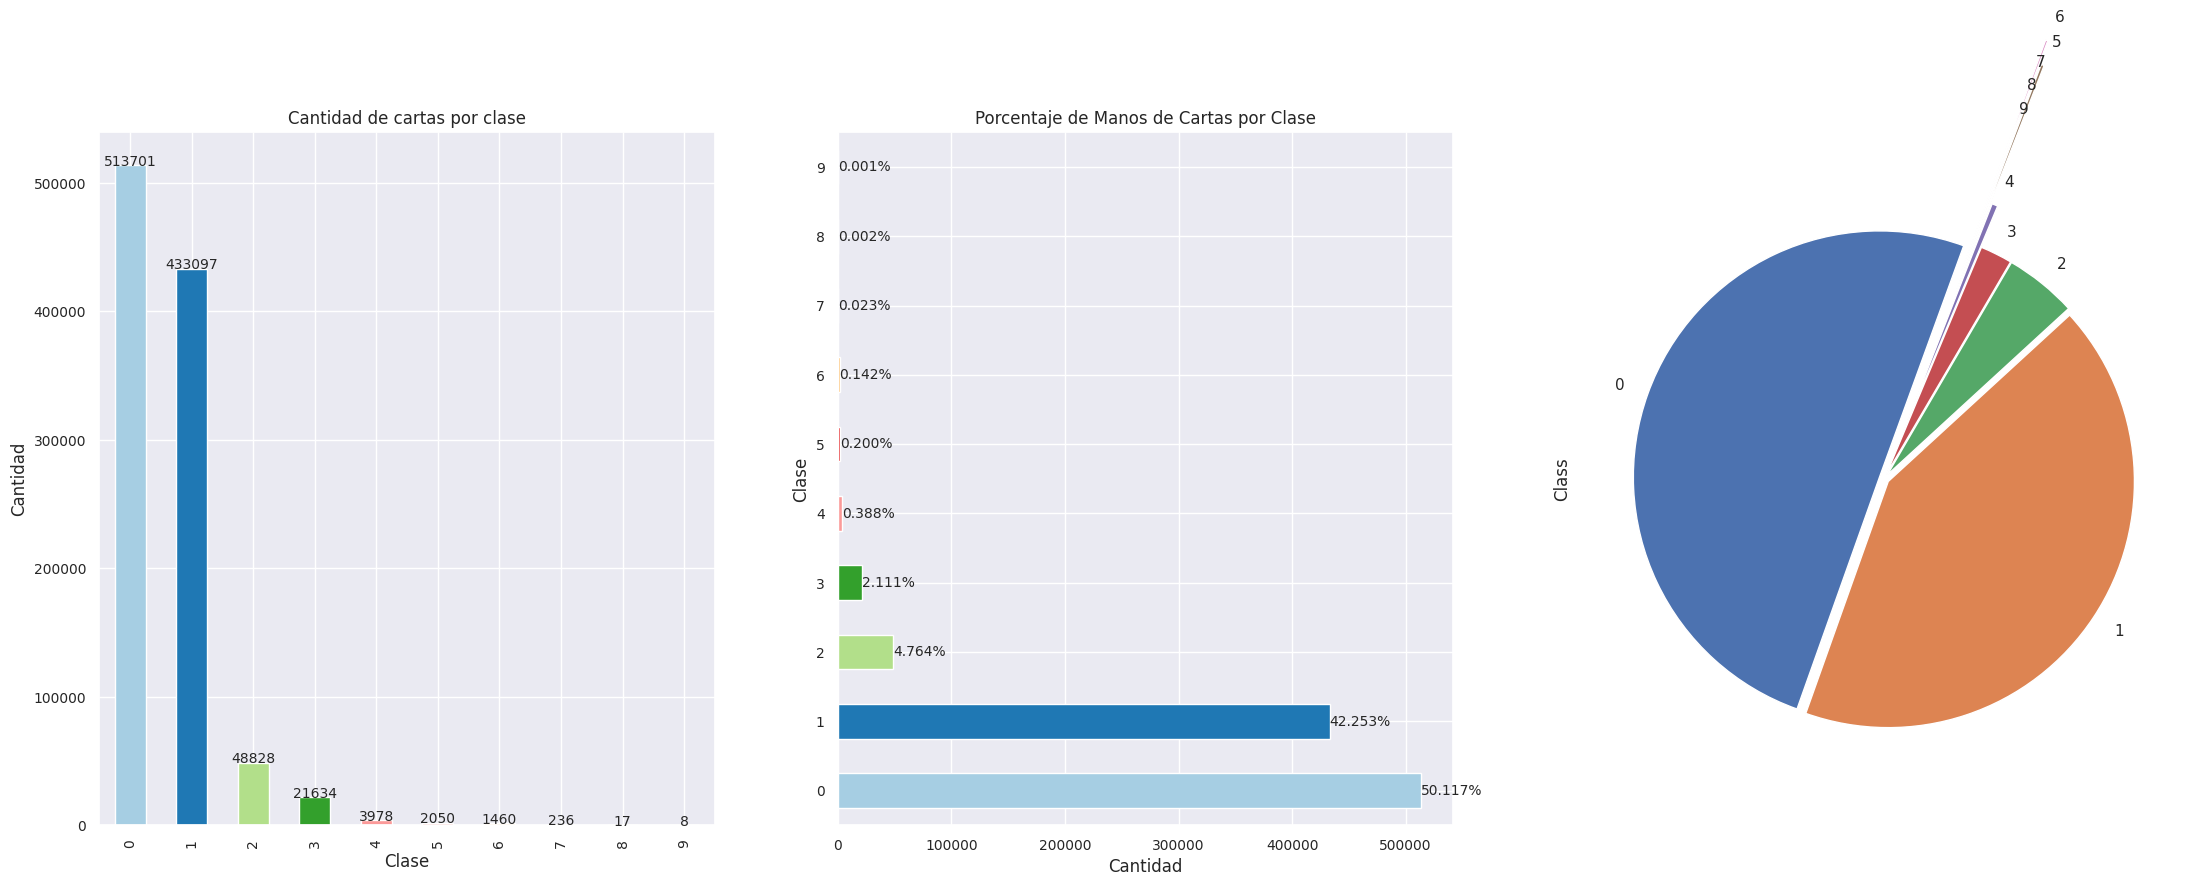

In [ ]:
#@title Primera Entrega
plt.subplots(figsize=(27,9))

#Grafica de barras del tipo de Mano por Clases
plt.subplot(1,3,1)
class_poker = poker.Class.value_counts()
colors_gender = sns.color_palette("Paired")
label = ["Nada en Mano","Un par","Dos pares","Trio","Escalera","Flush","Full House","Escalera Color","Royal Flush"]

class_poker.plot( kind='bar', xlabel='Clase', ylabel='Cantidad', layout='constrained', title='Cantidad de cartas por clase',
                  xlim=(0, 542000), grid='..', legend= False, color=colors_gender, fontsize=10)

for i, total in enumerate(class_poker):
  plt.text(i, total + 0.5, round(total), ha = 'center', size='small')


#Gráfica de barras
plt.subplot(1,3,2)
class_poker = poker.Class.value_counts()
colors_gender = sns.color_palette("Paired")
label = ["Nada en Mano","Un par","Dos pares","Trio","Escalera","Flush","Full House","Escalera Color","Royal Flush"]
class_poker.plot( kind='barh', xlabel='Cantidad', ylabel='Clase', layout='constrained', title='Porcentaje de Manos de Cartas por Clase',
                   xlim=(0, 542000), grid='..', legend= False, color=colors_gender, fontsize=10)
total = class_poker.values.sum()
for i in range (len(class_poker)):
   cnt = class_poker[i]
   pcnt = '{:0.3f}%'.format(100*cnt/total)
   plt.text(cnt-20, i, pcnt, va ='center', size='small')

#Gráfica Circular o Pie
plt.subplot(1,3,3)
class_poker = poker["Class"].value_counts()
explode = (0.02, 0.02, 0.02, 0.02, 0.20, 0.80, 0.90, 0.70, 0.60, 0.50) #Para sacar los pedacitos de "torta"
class_poker.plot(kind="pie", autopct=None, startangle=70, legend=False, explode=explode)


plt.show()

<ipython-input-5-a843215822c7>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,1)


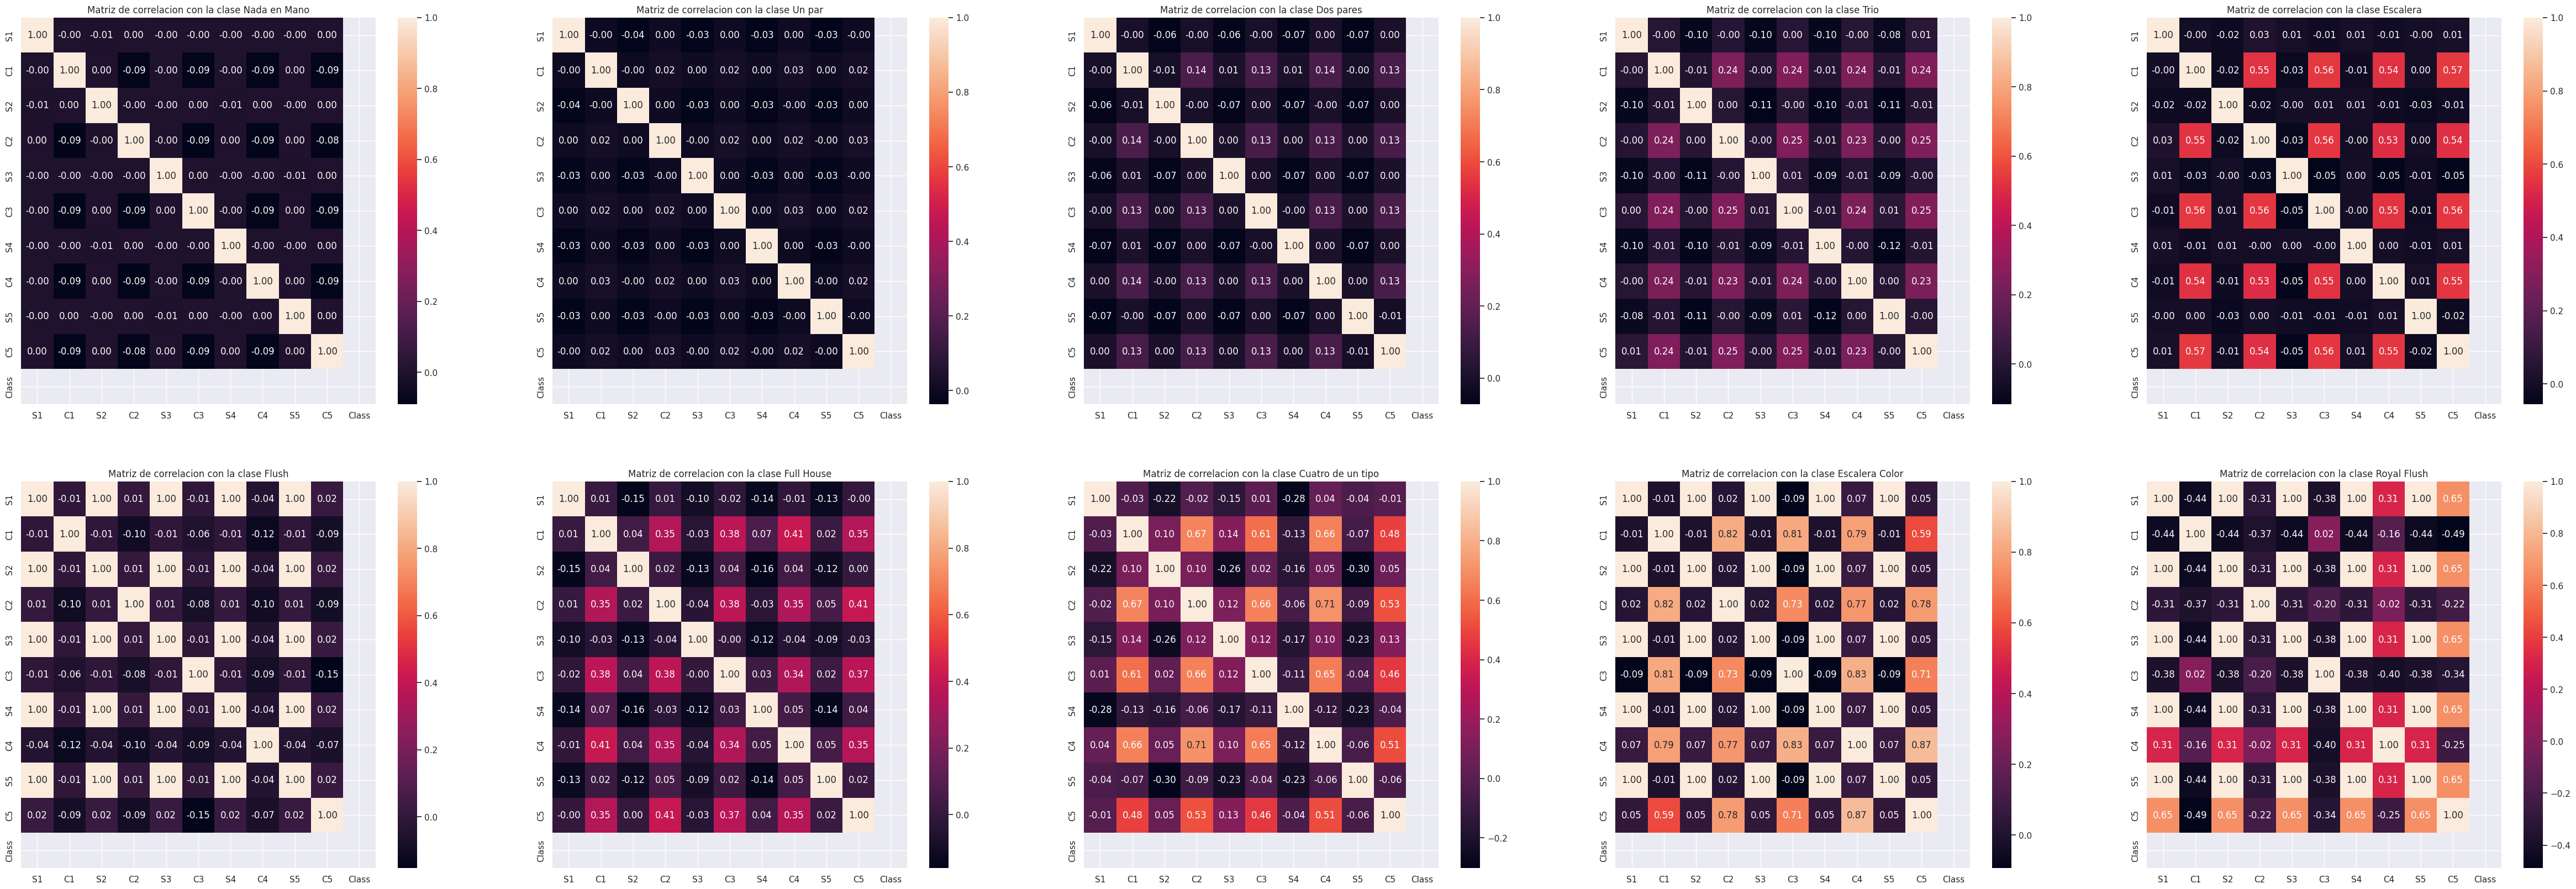

In [ ]:
# @title Matrices de correlación de cada clase
plt.subplots(figsize=(60,20)) #Importante para que se vean todas las correlaciones
plt.subplot(2,5,1)
plt.title("Matriz de correlacion con la clase Nada en Mano")
corr = poker[poker.Class==0].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,2)
plt.title("Matriz de correlacion con la clase Un par")
corr = poker[poker.Class==1].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,3)
plt.title("Matriz de correlacion con la clase Dos pares")
corr = poker[poker.Class==2].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,4)
plt.title("Matriz de correlacion con la clase Trio")
corr = poker[poker.Class==3].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,5)
plt.title("Matriz de correlacion con la clase Escalera")
corr = poker[poker.Class==4].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,6)
plt.title("Matriz de correlacion con la clase Flush")
corr = poker[poker.Class==5].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,7)
plt.title("Matriz de correlacion con la clase Full House")
corr = poker[poker.Class==6].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,8)
plt.title("Matriz de correlacion con la clase Cuatro de un tipo")
corr = poker[poker.Class==7].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,9)
plt.title("Matriz de correlacion con la clase Escalera Color")
corr = poker[poker.Class==8].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,10)
plt.title("Matriz de correlacion con la clase Royal Flush")
corr = poker[poker.Class==9].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

plt.show()

### Resumen de nuestro Dataset
1. Poseemos un dataset que principalmente se presta para clasificación de 10 tipos de manos de poquer
2. Contamos con un total de 1'025.009 de datos, sin embargo, la cantidad de registros que poseemos por mano de póquer no es muy balanceado por la misma naturaleza del juego y en comparación a las combinaciones totales tenemos solo un 39.4%  [[ 1 ]](https://es.wikipedia.org/wiki/Manos_de_p%C3%B3quer#Probabilidades)
3. Todos los registros fueron abstraídos y representados en números enteros.
4. Lo que buscamos principalmente es que los modelos que apliquemos a este dataset a lo largo del curso es que puedan reconocer el tipo de mano que posee en cualquier palo y orden de acuerdo a las reglas que viene para cada tipo de mano.

## **Funciones de Tunning**

In [ ]:
# @title Funciones de Tuning DT
def show_curve_DT():
    means, stds, means2, stds2 = [], [], [], []
    criterion_choice = ['gini', 'entropy', 'log_loss']
    means2, stds2 = [], []
    depth_range = range(20,201,2)
    for cri in criterion_choice:
        est= DecisionTreeClassifier(criterion=cri)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    crit = criterion_choice[np.argmax(means)]

    for max in depth_range:
        est2= DecisionTreeClassifier(criterion=crit, max_depth=max)
        s2 = cross_val_score(est2, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means2.append(np.mean(s2))
        stds2.append(np.std(s2))
    means2 = np.r_[means2]
    stds2  = np.r_[stds2]
    dep = depth_range[np.argmax(means2)]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(criterion_choice, means, label="mean", color="black")
    plt.fill_between(criterion_choice, means-stds, means+stds, color="salmon", alpha=.5, label="std")
    plt.xlabel("criterion")
    plt.ylabel("performance")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(depth_range, means2, label="mean", color="black")
    plt.fill_between(depth_range, means2-stds2, means2+stds2, color="crimson", alpha=.5, label="std")
    plt.xlabel("max_depth")
    plt.ylabel("performance")
    plt.legend()
    return crit, dep

In [ ]:
# @title Funciones de Tuning RF
def show_curve_RF():
    means, stds, means2, stds2, means3, stds3 = [], [], [], [], [], []
    estimators_range = range(100,501,10)
    criterion_choice = ['gini', 'entropy', 'log_loss']
    depth_range = range(20,201,2)
    for estim in estimators_range:
        est= RandomForestClassifier(n_estimators=estim)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    estim = estimators_range[np.argmax(means)]

    for cri in criterion_choice:
        est2= RandomForestClassifier(n_estimators=estim, criterion=cri)
        s2 = cross_val_score(est2, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means2.append(np.mean(s2))
        stds2.append(np.std(s2))
    means2 = np.r_[means2]
    stds2  = np.r_[stds2]
    criter = criterion_choice[np.argmax(means2)]

    for max in depth_range:
        est3= RandomForestClassifier(n_estimators=estim, criterion=criter, max_depth=max)
        s3 = cross_val_score(est3, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means3.append(np.mean(s3))
        stds3.append(np.std(s3))
    means3 = np.r_[means3]
    stds3  = np.r_[stds3]
    dept = depth_range[np.argmax(means3)]

    plt.figure(figsize=(21, 5))
    plt.subplot(1,3,1)
    plt.plot(estimators_range, means, label="mean", color="black")
    plt.fill_between(estimators_range, means-stds, means+stds, color="crimson", alpha=.5, label="std")
    plt.xlabel("n_estimators")
    plt.ylabel("performance")
    plt.legend()
    plt.subplot(1,3,2)
    plt.plot(criterion_choice, means2, label="mean", color="black")
    plt.fill_between(criterion_choice, means2-stds2, means2+stds2, color="salmon", alpha=.5, label="std")
    plt.xlabel("criterion")
    plt.ylabel("performance")
    plt.legend()
    plt.subplot(1,3,3)
    plt.plot(depth_range, means3, label="mean", color="black")
    plt.fill_between(depth_range, means3-stds3, means3+stds3, color="crimson", alpha=.5, label="std")
    plt.xlabel("max_depth")
    plt.ylabel("performance")
    plt.legend()
    return estim, criter, dept

In [ ]:
# @title Funciones de Tuning SVM
def show_curve_SVC():
    means, stds, means2, stds2, means3, stds3, means4, stds4 = [], [], [], [], [], [], [], []
    c_range = np.linspace(3, 50.0, 100)
    degree_range = range(2,21,2)
    for c in c_range:
        est= SVC(C=c,kernel='linear')
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))
    means = np.r_[means]
    stds  = np.r_[stds]
    c_l =  c_range[np.argmax(means)]
    for c in c_range:
        est2= SVC(C=c,kernel='poly')
        s2 = cross_val_score(est2, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means2.append(np.mean(s2))
        stds2.append(np.std(s2))
    means2 = np.r_[means2]
    stds2  = np.r_[stds2]
    c_p =  c_range[np.argmax(means2)]
    for deg in degree_range:
        est3= SVC(kernel='poly', C=c_p,  degree=deg)
        s3 = cross_val_score(est3, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means3.append(np.mean(s3))
        stds3.append(np.std(s3))
    means3 = np.r_[means3]
    stds3  = np.r_[stds3]
    d_p = degree_range[np.argmax(means3)]
    for c in c_range:
        est4= SVC(C=c,kernel='rbf')
        s4 = cross_val_score(est4, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        means4.append(np.mean(s4))
        stds4.append(np.std(s4))
    means4 = np.r_[means4]
    stds4  = np.r_[stds4]
    c_r = c_range[np.argmax(means4)]

    plt.figure(figsize=(30,5))
    plt.subplot(2,2,1)
    plt.plot(c_range, means, label="mean", color="black")
    plt.fill_between(c_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("C_linear")
    plt.ylabel("performance")
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(c_range, means2, label="mean", color="black")
    plt.fill_between(c_range, means2-stds2, means2+stds2, color="aquamarine", alpha=.5, label="std")
    plt.xlabel("C_Poly")
    plt.ylabel("performance")
    plt.legend()
    plt.subplot(2,2,3)
    plt.plot(degree_range, means3, label="mean", color="black")
    plt.fill_between(degree_range, means3-stds3, means3+stds3, color="crimson", alpha=.5, label="std")
    plt.xlabel("Grado")
    plt.ylabel("performance")
    plt.legend()
    plt.subplot(2,2,4)
    plt.plot(c_range, means4, label="mean", color="black")
    plt.fill_between(c_range, means4-stds4, means4+stds4, color="orange", alpha=.5, label="std")
    plt.xlabel("C_rbf")
    plt.ylabel("performance")
    plt.legend()
    return c_l, c_p, d_p, c_r

## **Pre-Balance**

In [ ]:
#@title Dataset pre-balance
poker1 = pd.read_csv("https://raw.githubusercontent.com/IC-03/Royal-Flush/main/Dataset/poker.csv")
X = poker1.values[:,:-1] # X: input columns
y = poker1.values[:,-1]  # y: colum to be predicted

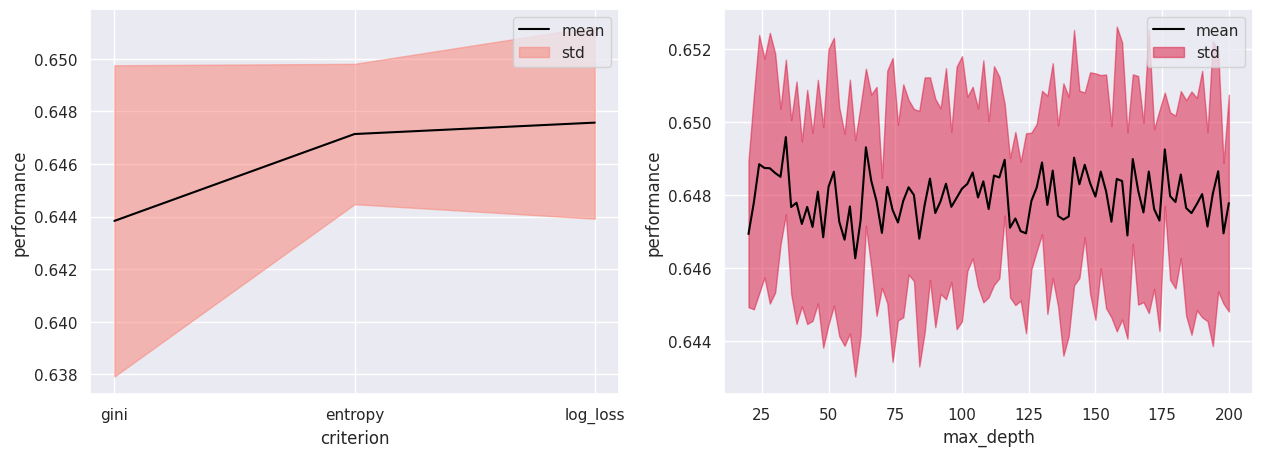

In [ ]:
cri_DT1, dep_DT1 = show_curve_DT()

In [ ]:
print("Para el metodo de DecisionTree el mejor Criterion es ('%s') y la mejor profundidad es (%d)"%(cri_DT1, dep_DT1))

Para el metodo de DecisionTree el mejor Criterion es ('log_loss') y la mejor profundidad es (34)


In [ ]:
est_RF1, cri_RF1, dep_RF1 = show_curve_RF()

KeyboardInterrupt: ignored

In [ ]:
print("Para el metodo de RandomForest el mejor n_Estimator es %d Criterion es ('%s') y la mejor profundidad es (%d)"%(est_RF1 , cri_RF1, dep_RF1))

In [ ]:
cl_SVC1, cp_SVC1, dp_SVC1, cr_SVC1 = show_curve_SVC()

In [ ]:
print("Para el metodo SLV con Kernel 'linear' el mejor parametro C es %.5f"%(cl_SVC1))
print("Para el metodo SLV con Kernel 'poly' el mejor parametro C es %.5f y el mejor grado es %d"%(cp_SVC1, dp_SVC1))
print("Para el metodo SLV con Kernel 'rbf' el mejor parametro C es %.5f"%(cr_SVC1))

### 🤖 Aplicando los diferentes modelos de clasificación vistos en clase


1. Gaussian Naive Bayes
2. Decision Tree
3. Random Forest
4. SVM (lineal)
5. SVM (polynomial)
6. SVM (RBF)



In [ ]:
# @title División del Dataset en 20% para testeo
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
#@title Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train1, y_train1)
y_pred_GNV = GNB.predict(X_test1)
GNB_s = cross_val_score(GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en GausianNaiveBayes es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_GNV, y_test1), np.mean(GNB_s), np.std(GNB_s)))

In [ ]:
#@title Decision Tree
DT = DecisionTreeClassifier(criterion=cri_DT1, max_depth=dep_DT1)
DT.fit(X_train1,y_train1)
y_pred_DT =DT.predict(X_test1)
DT_s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en DecisionTree es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_DT, y_test1), np.mean(DT_s), np.std(DT_s)))

In [ ]:
#@title Random Forest
RF = RandomForestClassifier(n_estimators= est_RF1, criterion=cri_RF1 , max_depth= dep_RF1 )
RF.fit(X_train1,y_train1)
y_pred_RF = RF.predict(X_test1)
RF_s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en RandomForest es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_RF, y_test1), np.mean(RF_s), np.std(RF_s)))

In [ ]:
#@title SVM (lineal)
SVM_ln = SVC(C=cl_SVC1, kernel='linear')
SVM_ln.fit(X_train1,y_train1)
y_pred_SVM_ln = SVM_ln.predict(X_test1)
SVC_l_s = cross_val_score(SVM_ln, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en SVM con kernel Linear es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_ln, y_test1), np.mean(SVC_l_s), np.std(SVC_l_s)))

In [ ]:
#@title SVM (polynomial)
SVM_poly = SVC(C= cp_SVC1, kernel='poly', degree=dp_SVC1)
SVM_poly.fit(X_train1,y_train1)
y_pred_SVM_poly = SVM_poly.predict(X_test1)
SVC_p_s = cross_val_score(SVM_poly, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en SVM con kernel poly es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_poly, y_test1), np.mean(SVC_p_s), np.std(SVC_p_s)))

In [ ]:
#@title SVM (RBF)
SVM_rbf = SVC(C= cr_SVC1, kernel='rbf')
SVM_rbf.fit(X_train1,y_train1)
y_pred_SVM_rbf= SVM_rbf.predict(X_test1)
SVC_r_s = cross_val_score(SVM_rbf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en SVM con kernel rbf es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_rbf, y_test1), np.mean(SVC_r_s), np.std(SVC_r_s)))

## **Balance**

### 📊 Arreglando el problema de desbalace de clases

In [ ]:
# @title Clase: 0 -> Eliminar datos (perdida de información)
clase_0 = poker[poker['Class'] == 0]
clase_0 = sklearn.utils.shuffle(clase_0)
clase_0.drop(clase_0.index[480:513702], inplace=True)
print(clase_0.shape)

(480, 11)


In [ ]:
# @title Clase: 1 -> Eliminar datos (perdida de información)
clase_1 = poker[poker['Class'] == 1]
clase_1 = sklearn.utils.shuffle(clase_1)
clase_1.drop(clase_1.index[480:70000000], inplace=True)
print(clase_1.shape)

(480, 11)


In [ ]:
# @title Clase: 2  -> Eliminar datos (perdida de información)
clase_2 = poker[poker['Class'] == 2]
clase_2 = sklearn.utils.shuffle(clase_1)
clase_2.drop(clase_2.index[480:433098], inplace=True)
print(clase_2.shape)

(480, 11)


In [ ]:
# @title Clase: 3 -> Eliminar datos (perdida de información)
from itertools import permutations,combinations

clase_3 = poker[poker['Class'] == 3]

# lista_cartas, lista_final, perm, fila,filas, filas_end, filas_30 , filas_3, pareja =[], [], [], [], [],[],[], [], []
# palo_3 = [1,2,3,4]
# cartas_30 = [1,2,3,4,5,6,7,8,9,10,11]
# cartas_3 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
# indices_palo = [0, 2, 4]
# indices_palo_2 = [6, 8]
# indices_carta = [1,3,5,7,9]

# for car in cartas_30:
#   carta_3 =[]
#   for c in cartas_3:
#     for b in cartas_3:
#       carta_3 = [car, car+1 ,car+2 ,c , b]
#       lista_cartas.append(carta_3)

# lista_temp = []
# perm_palo = list(combinations(palo_3, 3))
# perm_palo_2 = list(combinations(palo_3, 2))
# for pal in perm_palo:
#   for carta in lista_cartas:
#     carta = carta.copy()
#     for pa, index in zip(list(pal),indices_palo):
#       carta.insert(index, pa)
#     lista_temp.append(carta)
# for pal in perm_palo_2:
#   for carta in lista_temp:
#     carta = carta.copy()
#     for pa, index in zip(list(pal),indices_palo_2):
#       carta.insert(index, pa)
#     lista_final.append(carta)

# # agrupo en parejas
# for carta in lista_final:
#   carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
#   filas.append(carta)

# # Elimino cartas repetidas
# for sublista in filas:
#    if len(sublista) == len(set(map(tuple, sublista))):
#     filas_end.append(sublista)

# for carta in filas_end:
#   perm = list(permutations(carta))
#   for cart in perm:
#     fila = list(cart)
#     filas_30.append(fila)

# # Extiendo las listas
# for carta in filas_30:
#     pareja = []
#     for sublista in carta:
#         pareja.extend(sublista)
#     pareja.insert(10,3)
#     filas_3.append(pareja)

# clase_3 = pd.DataFrame(filas_3, columns=clase_3.columns)
clase_3 = sklearn.utils.shuffle(clase_3)
clase_3.drop(clase_3.index[480:21635], inplace=True)
print(clase_3.shape)

(480, 11)


In [ ]:
# @title Clase: 4 -> Aumento de datos
from itertools import permutations,combinations

clase_4 = poker[poker['Class'] == 4]

lista_cartas, lista_final, perm, fila,filas, filas_end, filas_40 , filas_4, pareja =[], [], [], [], [],[],[], [], []
palo_4 = [1,2,3,4]
cartas_4 = [1,2,3,4,5,6,7,8,9]
indices_palo = [0, 2, 4, 6,8]
indices_carta = [1,3,5,7,9]

for car in cartas_4:
  carta_4 = [car, car+1 ,car+2 ,car+3 , car+4]
  lista_cartas.append(carta_4)

lista_temp = []
perm_palo = list(permutations(palo_4,))

for pal in perm_palo:
  for carta in lista_cartas:
    carta = carta.copy()
    for pa, index in zip(list(pal),indices_palo):
      carta.insert(index, pa)
    lista_temp.append(carta)

#Agrego en la posicion 8 el palo de la carta aleatoria
for pal in palo_4:
  for cart in lista_temp:
    cart =cart.copy()
    cart.insert(8, pal)
    lista_final.append(cart)

# agrupo en parejas
for carta in lista_final:
  carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
  filas.append(carta)

# Elimino cartas repetidas
for sublista in filas:
   if len(sublista) == len(set(map(tuple, sublista))):
    filas_end.append(sublista)

for carta in filas_end:
  perm = list(permutations(carta))
  for cart in perm:
    fila = list(cart)
    filas_40.append(fila)

# Extiendo las listas
for carta in filas_40:
    pareja = []
    for sublista in carta:
        pareja.extend(sublista)
    pareja.insert(10,4)
    filas_4.append(pareja)

clase_4 = pd.DataFrame(filas_4, columns=clase_4.columns)
clase_4 = sklearn.utils.shuffle(clase_4)
clase_4.drop(clase_4.index[480:7000000], inplace=True)
print(clase_4.shape)

(480, 11)


In [ ]:
# @title Clase: 5 -> Aumento de datos
from itertools import permutations,combinations

clase_5 = poker[poker['Class'] == 5]
perm, fila, filas_5 =[], [], []
palo_5 = [1,2,3,4]
carta_5 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
indices_palo = [0, 2, 4, 6, 8]

perm = list(permutations(carta_5, 5)) #Lista de Todas las permutaciones
for carta in perm:
  for palo in palo_5:
    fila = list(carta)
    for index in indices_palo:
      fila.insert(index, palo)
    fila.insert(10,5)
    filas_5.append(fila)
clase_5 = pd.DataFrame(filas_5, columns=clase_5.columns)
clase_5 = sklearn.utils.shuffle(clase_5)
clase_5.drop(clase_5.index[480:70000000], inplace=True)
print(clase_5.shape)

(480, 11)


In [ ]:
# @title Clase: 6 -> Aumento de datos
from itertools import permutations,combinations

clase_6 = poker[poker['Class'] == 6]

lista_cartas, lista_final, perm, fila,filas, filas_end, filas_60 , filas_6, pareja =[], [], [], [], [],[],[], [], []
palo_6 = [1,2,3,4]
cartas_6 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
indices_palo = [0, 2, 4]
indices_palo_2 = [6, 8]
indices_carta = [1,3,5,7,9]

for car in cartas_6:
  carta_6 =[]
  for c in cartas_6:
    carta_6 = [car, car ,car ,c , c]
    lista_cartas.append(carta_6)

lista_temp = []
perm_palo = list(combinations(palo_6, 3))
perm_palo_2 = list(combinations(palo_6, 2))
for pal in perm_palo:
  for carta in lista_cartas:
    carta = carta.copy()
    for pa, index in zip(list(pal),indices_palo):
      carta.insert(index, pa)
    lista_temp.append(carta)
for pal in perm_palo_2:
  for carta in lista_temp:
    carta = carta.copy()
    for pa, index in zip(list(pal),indices_palo_2):
      carta.insert(index, pa)
    lista_final.append(carta)

# agrupo en parejas
for carta in lista_final:
  carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
  filas.append(carta)

# Elimino cartas repetidas
for sublista in filas:
   if len(sublista) == len(set(map(tuple, sublista))):
    filas_end.append(sublista)

for carta in filas_end:
  perm = list(permutations(carta))
  for cart in perm:
    fila = list(cart)
    filas_60.append(fila)

# Extiendo las listas
for carta in filas_60:
    pareja = []
    for sublista in carta:
        pareja.extend(sublista)
    pareja.insert(10,6)
    filas_6.append(pareja)

clase_6 = pd.DataFrame(filas_6, columns=clase_6.columns)
clase_6 = sklearn.utils.shuffle(clase_6)
clase_6.drop(clase_6.index[480:70000000], inplace=True)
print(clase_6.shape)

(480, 11)


In [ ]:
# @title Clase: 7 -> Aumento de datos
from itertools import permutations

clase_7 = poker[poker['Class'] == 7]

lista_cartas, lista_final, perm, fila,filas, filas_end, filas_70 , filas_7, pareja =[], [], [], [], [],[],[], [], []
palo_7 = [1,2,3,4]
cartas_7 = [1,2,3,4,5,6,7,8,9,10,11,12,13]
indices_palo = [0, 2, 4, 6]
indices_carta = [1,3,5,7,9]

for car in cartas_7:
  carta_7 =[]
  for c in cartas_7:
    carta_7 = [car, car ,car ,car , c]
    for palo, index in zip(palo_7,indices_palo):
      carta_7.insert(index, palo)
      lista_cartas.append(carta_7)

#Agrego en la posicion 8 el palo de la carta aleatoria
contador = 1
for cart in lista_cartas:
  cart =cart.copy()
  cart.insert(8, contador)
  lista_final.append(cart)
  contador += 1
  if contador > 4:
    contador = 1

# Agrupo en parejas
for carta in lista_final:
  carta = [carta[i:i + 2] for i in range(0, len(carta), 2)].copy()
  filas.append(carta)

# Elimino cartas repetidas
for sublista in filas:
   if len(sublista) == len(set(map(tuple, sublista))):
    filas_end.append(sublista)

for carta in filas_end:
  perm = list(permutations(carta))
  for cart in perm:
    fila = list(cart)
    filas_70.append(fila)

for carta in filas_70:
    pareja = []
    for sublista in carta:
        pareja.extend(sublista)
    pareja.insert(10,7)
    filas_7.append(pareja)

clase_7 = pd.DataFrame(filas_7, columns=clase_7.columns)
clase_7 = sklearn.utils.shuffle(clase_7)
clase_7.drop(clase_7.index[480:433098], inplace=True)
print(clase_7.shape)

(480, 11)


In [ ]:
# @title Clase: 8 -> Aumento de datos
from itertools import permutations

clase_8 = poker[poker['Class'] == 8]

perm, fila, filas_8 =[], [], []
palo_8 = [1,2,3,4]
indices_palo = [0, 2, 4, 6, 8]

for init_carta in [1,2,3,4,5,6,7,8,9]:
  carta_8 = [init_carta, init_carta+1 ,init_carta+2 ,init_carta+3 ,init_carta+4]
  perm = list(permutations(carta_8))
  for carta in perm:
      for palo in palo_8:
          fila = list(carta)
          for index in indices_palo:
            fila.insert(index, palo)
          fila.insert(10,8)
          filas_8.append(fila)
clase_8 = pd.DataFrame(filas_8, columns=clase_8.columns)
clase_8 = sklearn.utils.shuffle(clase_8)
clase_8.drop(clase_8.index[480:7000000], inplace=True)
print(clase_8.shape)

(480, 11)


In [ ]:
# @title Clase: 9 -> Aumento de datos
from itertools import permutations

clase_9 = poker[poker['Class'] == 9]
perm, fila, filas_9 =[], [], []
palo_9 = [1,2,3,4]
carta_9 = [1,10,11,12,13]
indices_palo = [0, 2, 4, 6, 8]

perm = list(permutations(carta_9)) #Lista de Todas las permutaciones

for carta in perm:
    for palo in palo_9:
        fila = list(carta)
        for index in indices_palo:
          fila.insert(index, palo)
        fila.insert(10,9)
        filas_9.append(fila)
clase_9 = pd.DataFrame(filas_9, columns=clase_9.columns)
clase_9 = sklearn.utils.shuffle(clase_9)
print(clase_9.shape)

(480, 11)


In [ ]:
poker2 = pd.concat([clase_0, clase_1, clase_2, clase_3, clase_4, clase_5, clase_6, clase_7, clase_8, clase_9], axis=0).reset_index(drop=True)
poker2 = sklearn.utils.shuffle(poker2)
# poker2.to_csv("poker2.csv", index =False) #Exportar csv del dataset balanceeado

### 🤖 Aplicando los modelos de clasificación con el dataset balanceado

In [ ]:
poker2 = pd.read_csv("https://raw.githubusercontent.com/IC-03/Royal-Flush/main/Dataset/poker2.csv")
X = poker2.values[:,:-1] # X: input columns
y = poker2.values[:,-1]  # y: colum to be predicted
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=12)

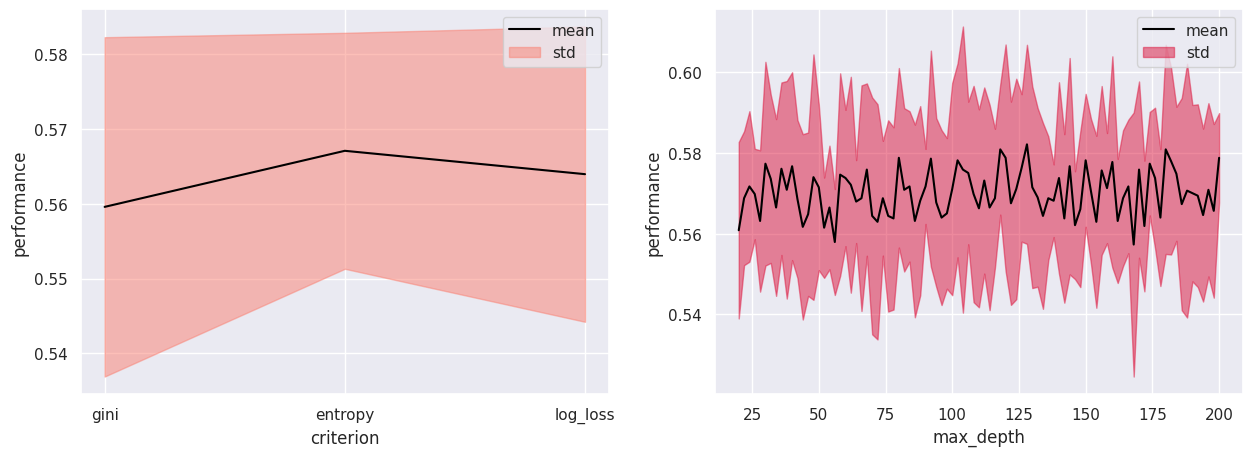

In [ ]:
cri_DT2, dep_DT2 = show_curve_DT()

In [ ]:
print("Para el metodo de DecisionTree el mejor Criterion es ('%s') y la mejor profundidad es (%d)"%(cri_DT2, dep_DT2))

Para el metodo de DecisionTree el mejor Criterion es ('entropy') y la mejor profundidad es (128)


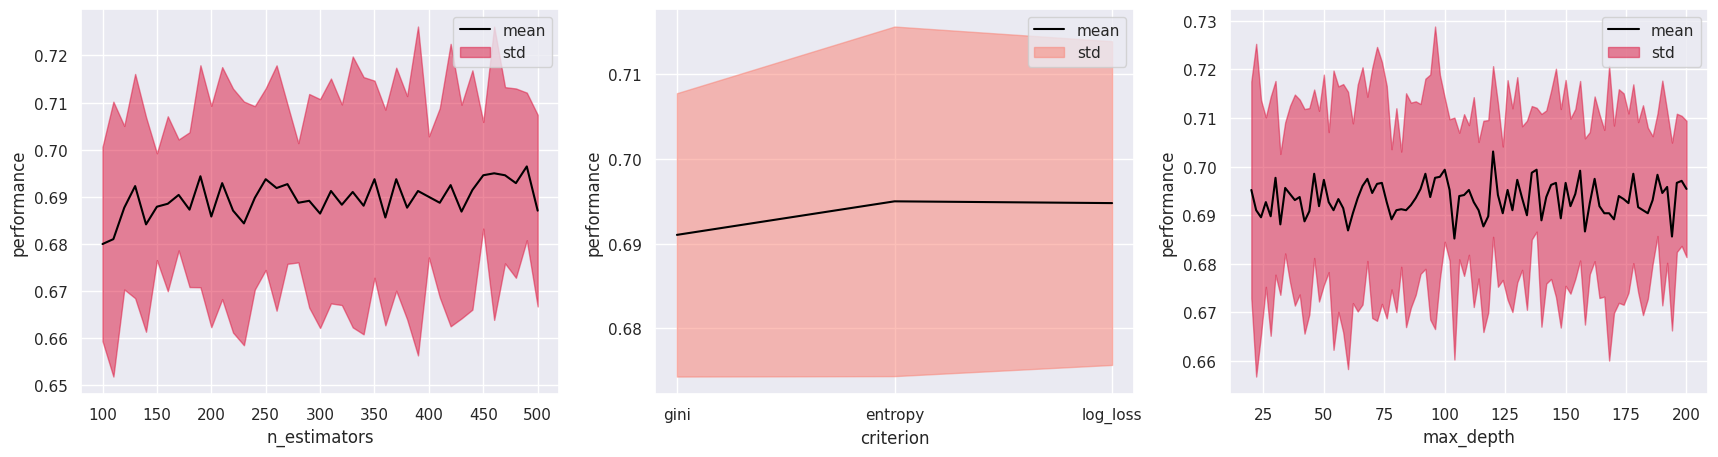

In [ ]:
est_RF2, cri_RF2, dep_RF2 = show_curve_RF()

In [ ]:
print("Para el metodo de RandomForest el mejor n_Estimator es %d Criterion es ('%s') y la mejor profundidad es (%d)"%(est_RF2 , cri_RF2, dep_RF2))

Para el metodo de RandomForest el mejor n_Estimator es 490 Criterion es ('entropy') y la mejor profundidad es (120)


In [ ]:
cl_SVC2, cp_SVC2, dp_SVC2, cr_SVC2 = show_curve_SVC()

In [ ]:
print("Para el metodo SLV con Kernel 'linear' el mejor parametro C es %.5f"%(cl_SVC2))
print("Para el metodo SLV con Kernel 'poly' el mejor parametro C es %.5f y el mejor grado es %d"%(cp_SVC2, dp_SVC2))
print("Para el metodo SLV con Kernel 'rbf' el mejor parametro C es %.5f"%(cr_SVC2))

In [ ]:
#@title Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train2, y_train2)
y_pred_GNV = GNB.predict(X_test2)
GNB_s = cross_val_score(GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en GausianNaiveBayes es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_GNV, y_test2), np.mean(GNB_s), np.std(GNB_s)))

In [ ]:
#@title Decision Tree
DT = DecisionTreeClassifier(criterion='entropy', max_depth=128)
DT.fit(X_train2,y_train2)
y_pred_DT =DT.predict(X_test2)
DT_s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en DecisionTree es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_DT, y_test2), np.mean(DT_s), np.std(DT_s)))

In [ ]:
#@title Random Forest
RF = RandomForestClassifier(n_estimators= 490, criterion='entropy' , max_depth= 120 )
RF.fit(X_train2,y_train2)
y_pred_RF = RF.predict(X_test2)
RF_s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en RandomForest es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_RF, y_test2), np.mean(RF_s), np.std(RF_s)))

In [ ]:
#@title SVM
#(lineal)
SVM_ln = SVC(C=cl_SVC2, kernel='linear')
SVM_ln.fit(X_train2,y_train2)
y_pred_SVM_ln = SVM_ln.predict(X_test2)
SVC_l_s = cross_val_score(SVM_ln, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en SVM con kernel Linear es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_ln, y_test2), np.mean(SVC_l_s), np.std(SVC_l_s)))

#(polynomial)
SVM_poly = SVC(C= cp_SVC2, kernel='poly', degree=dp_SVC2)
SVM_poly.fit(X_train2,y_train2)
y_pred_SVM_poly = SVM_poly.predict(X_test2)
SVC_p_s = cross_val_score(SVM_poly, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en SVM con kernel poly es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_poly, y_test2), np.mean(SVC_p_s), np.std(SVC_p_s)))

# (RBF)
SVM_rbf = SVC(C= cr_SVC2, kernel='rbf')
SVM_rbf.fit(X_train2,y_train2)
y_pred_SVM_rbf= SVM_rbf.predict(X_test2)
SVC_r_s = cross_val_score(SVM_rbf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy en SVM con kernel rbf es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_rbf, y_test2), np.mean(SVC_r_s), np.std(SVC_r_s)))

## **Modelo de DeepLearning**

In [ ]:
# @title Modelo
import tensorflow as tf
from tensorflow import keras
print(X_train2[0].shape)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (X_train2[0].shape)),
    tf.keras.layers.Dense(4096, activation=tf.nn.relu),
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

(10,)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 10)                0         
                                                                 
 dense_84 (Dense)            (None, 4096)              45056     
                                                                 
 dense_85 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_86 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_87 (Dense)            (None, 512)               524800    
                                                                 
 dense_88 (Dense)            (None, 256)               131328    
                                                                 
 dense_89 (Dense)            (None, 128)        

Epoch 1/60
39/39 [==============================] - 2s 14ms/step - loss: 9.8712 - accuracy: 0.1138 - val_loss: 9.3937 - val_accuracy: 0.1115
Epoch 2/60
39/39 [==============================] - 0s 9ms/step - loss: 9.8686 - accuracy: 0.1112 - val_loss: 9.3935 - val_accuracy: 0.0990
Epoch 3/60
39/39 [==============================] - 0s 8ms/step - loss: 9.8684 - accuracy: 0.0979 - val_loss: 9.3934 - val_accuracy: 0.1052
Epoch 4/60
39/39 [==============================] - 0s 9ms/step - loss: 9.8683 - accuracy: 0.1060 - val_loss: 9.3934 - val_accuracy: 0.1135
Epoch 5/60
39/39 [==============================] - 0s 10ms/step - loss: 9.8683 - accuracy: 0.1102 - val_loss: 9.3934 - val_accuracy: 0.1094
Epoch 6/60
39/39 [==============================] - 0s 10ms/step - loss: 9.8683 - accuracy: 0.1073 - val_loss: 9.3933 - val_accuracy: 0.1115
Epoch 7/60
39/39 [==============================] - 0s 11ms/step - loss: 9.8683 - accuracy: 0.1091 - val_loss: 9.3933 - val_accuracy: 0.1104
Epoch 8/60
39/39

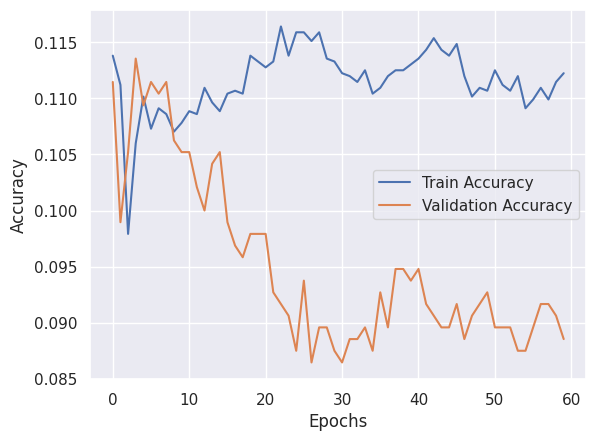

In [ ]:
#@title Compilar y entrenar
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train2,
          y_train2,
          epochs=60,
          batch_size=100,
          validation_data=(X_test2, y_test2))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#@title Evaluar el Modelo
test_loss, test_acc = model.evaluate(X_test2, y_test2, verbose=False)
print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

Test accuracy: 0.1197916641831398  test_loss:  9.393207550048828


## **PCA**

total_explained_variance (k=0): 0
total_explained_variance (k=1): 0.3253614329048179
total_explained_variance (k=2): 0.47808871890935095
total_explained_variance (k=3): 0.6285022849303967
total_explained_variance (k=4): 0.7729942536899328
total_explained_variance (k=5): 0.916835367211706
total_explained_variance (k=6): 0.948788144382972
total_explained_variance (k=7): 0.9622170512331562
total_explained_variance (k=8): 0.975474226449265
total_explained_variance (k=9): 0.9882481929691632
total_explained_variance (k=10): 0.9999999999999999


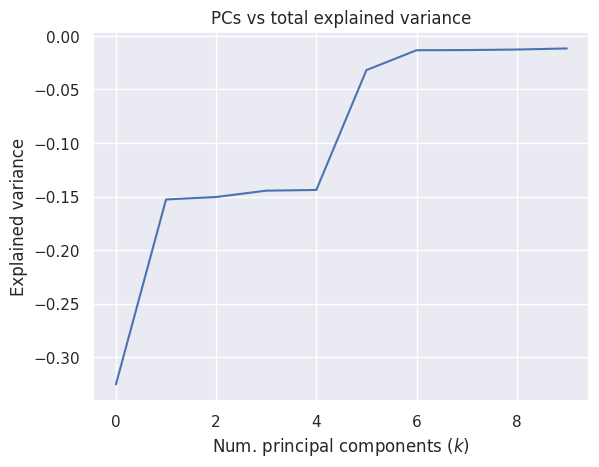

In [ ]:
# @title Hallando Componentes
X = poker2.values[:,:-1] # X: input columns
y = poker2.values[:,-1]  # y: colum to be predicted
X_train2, X_test2, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=12)

mean = np.mean(X)
std = np.std(X)
standardized_data = (X - mean) / std

covariance_matrix = np.cov(standardized_data, ddof = 1, rowvar = False)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

order_of_importance = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]

explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

for k in range(0,11):
  total_explained_variance = sum(explained_variance[:k])
  print(f"total_explained_variance (k={k}):", total_explained_variance)

plt.plot(-1*explained_variance)
plt.title("PCs vs total explained variance")
plt.xlabel("Num. principal components ($k$)")
plt.ylabel("Explained variance")
plt.show()

In [ ]:
# @title PCA
pca_poker2 = PCA(n_components= 5, whiten=True)
pca_poker2.fit(X_train2)
X_train3 = pca_poker2.transform(X_train2)
X_test3 = pca_poker2.transform(X_test2)

In [ ]:
# @title Aplicando los modelos de clasificación con el dataset balanceado

# Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train3, y_train3)
y_pred_GNV = GNB.predict(X_test3)
GNB_s = cross_val_score(GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

# Decision Tree
DT = DecisionTreeClassifier(criterion='entropy', max_depth=128)
DT.fit(X_train3,y_train3)
y_pred_DT =DT.predict(X_test3)
DT_s = cross_val_score(DT, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

# Random Forest
RF = RandomForestClassifier(n_estimators= 490, criterion='entropy' , max_depth= 120 )
RF.fit(X_train3,y_train3)
y_pred_RF = RF.predict(X_test3)
RF_s = cross_val_score(RF, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

# SVM
#(lineal)
SVM_ln = SVC(C=cl_SVC2, kernel='linear')
SVM_ln.fit(X_train2,y_train2)
y_pred_SVM_ln = SVM_ln.predict(X_test2)
SVC_l_s = cross_val_score(SVM_ln, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

#(polynomial)
SVM_poly = SVC(C= cp_SVC2, kernel='poly', degree=dp_SVC2)
SVM_poly.fit(X_train2,y_train2)
y_pred_SVM_poly = SVM_poly.predict(X_test2)
SVC_p_s = cross_val_score(SVM_poly, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

# (RBF)
SVM_rbf = SVC(C= cr_SVC2, kernel='rbf')
SVM_rbf.fit(X_train2,y_train2)
y_pred_SVM_rbf= SVM_rbf.predict(X_test2)
SVC_r_s = cross_val_score(SVM_rbf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

print("accuracy en GausianNaiveBayes es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_GNV, y_test3), np.mean(GNB_s), np.std(GNB_s)))
print("accuracy en DecisionTree es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_DT, y_test3), np.mean(DT_s), np.std(DT_s)))
print("accuracy en RandomForest es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_RF, y_test3), np.mean(RF_s), np.std(RF_s)))
print("accuracy en SVM con kernel Linear es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_ln, y_test2), np.mean(SVC_l_s), np.std(SVC_l_s)))
print("accuracy en SVM con kernel poly es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_poly, y_test2), np.mean(SVC_p_s), np.std(SVC_p_s)))
print("accuracy en SVM con kernel rbf es %.5f y con cross validation %.5f (+/- %.5f)"%(accuracy_score(y_pred_SVM_rbf, y_test2), np.mean(SVC_r_s), np.std(SVC_r_s)))


accuracy en GausianNaiveBayes es 0.34792 y con cross validation 0.30354 (+/- 0.02414)


## **NO supervisado**

### KMeans

In [ ]:
# @title PCA y KMeans
X = poker2.values[:,:-1] # X: input columns
y = poker2.values[:,-1]  # y: colum to be predicted
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=21)

# Elegimos 3 componentes para gráficar, aunque no cumple la regla de la Varianza Explicada
pca_poker = PCA(n_components= 3, whiten=True)
xtrain_poker_pca = pca_poker.fit_transform(X_train2)
xtest_poker_pca = pca_poker.fit_transform(X_test2)
print(xtrain_poker_pca.shape)

(3840, 3)


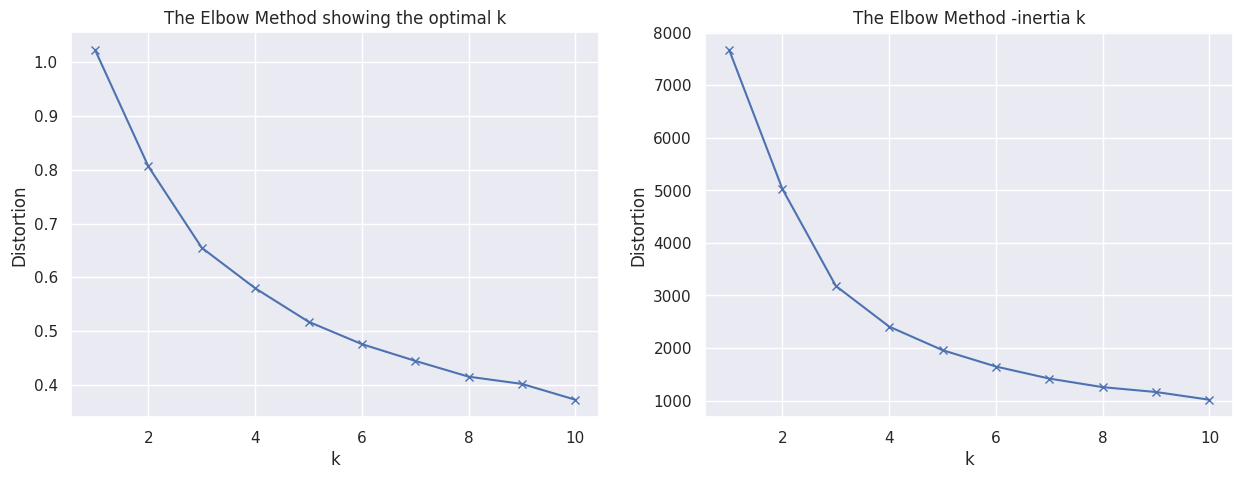

In [ ]:
# @title Kmeans: Criterio del codo
from scipy.spatial.distance import cdist

distortions = []
wss = [] #Within-Cluster-Sum of Squared
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto')
    kmeanModel.fit(xtrain_poker_pca)
    distortions.append(sum(np.min(cdist(xtrain_poker_pca, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) #Distancias minimas de
    wss.append(kmeanModel.inertia_)  #Distancia entre costlers, busca que los cluster este los mas cercano posible

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(K, distortions, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.subplot(122)
plt.plot(K, wss, 'bx-'); plt.xlabel('k');plt.ylabel('Distortion')
plt.title('The Elbow Method -inertia k')
plt.show()

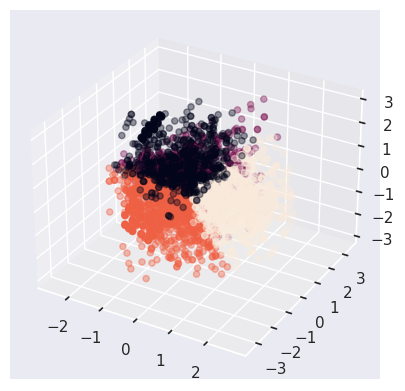

In [ ]:
kmeanModel = KMeans(n_clusters=4, n_init='auto')
kmeanModel.fit(xtrain_poker_pca)
ax = plt.axes(projection="3d")
ax.scatter3D(xtrain_poker_pca[:,0],xtrain_poker_pca[:,1],xtrain_poker_pca[:,2],c=kmeanModel.labels_, alpha=0.4)
ax.scatter3D(kmeanModel.cluster_centers_[:,0] ,kmeanModel.cluster_centers_[:,1],kmeanModel.cluster_centers_[:,2], color='white')
plt.show()